# CPU UTILIZATION

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Import pandas
import pandas as pd

m_o = pd.read_csv("/content/drive/MyDrive/Education/Phd/research/SLM/Data Visualization/Macmini/OpenELM/cpu_usage.csv")
m_o_mem = pd.read_csv("/content/drive/MyDrive/Education/Phd/research/SLM/Data Visualization/Macmini/OpenELM//memory_usage.csv", index_col=False)
m_o_pswitch = pd.read_csv("/content/drive/MyDrive/Education/Phd/research/SLM/Data Visualization/Macmini/OpenELM//process_count.csv", index_col=False)
m_o_db = "/content/drive/MyDrive/Education/Phd/research/SLM/Data Visualization/Macmini/OpenELM/disk_busy_rate.txt"
m_o_swap = pd.read_csv("/content/drive/MyDrive/Education/Phd/research/SLM/Data Visualization/Macmini/OpenELM//swap_usage.csv", index_col=False)

In [16]:
print('swap\n',m_o_swap.head())
print('memory\n',m_o_mem.head())
print('process\n',m_o_pswitch.head())

swap
    Total Swap  Used Swap  Free Swap
0         0.0        0.0        0.0
1         0.0        0.0        0.0
2         0.0        0.0        0.0
3         0.0        0.0        0.0
4         0.0        0.0        0.0
memory
    Total Memory  Active Memory  Used Memory  Free Memory  Inactive Memory
0       16384.0        6753.34      8011.61       962.33          6637.22
1       16384.0        6775.67      8044.59       925.66          6642.36
2       16384.0        6797.03      8031.33       926.70          6653.14
3       16384.0        6776.11      8034.31       926.28          6651.28
4       16384.0        6265.36      8154.03       863.33          6595.22
process
    Total Processes
0              565
1              569
2              568
3              569
4              559


In [17]:


# Initialize lists to hold the data
data = {
    "disk0": [],
    "disk10": [],
    "disk12": [],
    "disk14": []
}

with open(m_o_db, 'r') as file:
    lines = file.readlines()

    # Debug: Print the header
    print("Header:", lines[0])

    for line in lines[1:]:  # Skip the header
        if line.strip():
            parts = line.split()
            # Debug: Print the line parts
            print("Line parts:", parts)
            if len(parts) >= 12:  # Ensure line has the correct number of parts
                try:
                    data["disk0"].append(float(parts[2]))
                    data["disk10"].append(float(parts[5]))
                    data["disk12"].append(float(parts[8]))
                    data["disk14"].append(float(parts[11]))
                except ValueError as e:
                    # Debug: Print the error message
                    print("Error parsing line:", line)
                    print(e)

# Step 2: Convert to pandas DataFrame
m_o_db = pd.DataFrame(data)

# Debug: Print the DataFrame to check the parsed data
print(m_o_db)


# Step 3: Calculate the combined tps
m_o_db['Disk Usage %'] = m_o_db.sum(axis=1)

m_o_db['Disk Usage %'] = (m_o_db['Disk Usage %'] / 2800) * 100


Header:               disk0              disk10              disk12              disk14 

Line parts: ['KB/t', 'tps', 'MB/s', 'KB/t', 'tps', 'MB/s', 'KB/t', 'tps', 'MB/s', 'KB/t', 'tps', 'MB/s']
Error parsing line:     KB/t  tps  MB/s     KB/t  tps  MB/s     KB/t  tps  MB/s     KB/t  tps  MB/s 

could not convert string to float: 'MB/s'
Line parts: ['24.00', '58', '1.36', '8.33', '0', '0.00', '8.08', '0', '0.00', '8.71', '0', '0.00']
Line parts: ['9.23', '13', '0.12', '0.00', '0', '0.00', '0.00', '0', '0.00', '0.00', '0', '0.00']
Line parts: ['0.00', '0', '0.00', '0.00', '0', '0.00', '0.00', '0', '0.00', '0.00', '0', '0.00']
Line parts: ['4.00', '1', '0.00', '0.00', '0', '0.00', '0.00', '0', '0.00', '0.00', '0', '0.00']
Line parts: ['8.00', '6', '0.05', '0.00', '0', '0.00', '0.00', '0', '0.00', '0.00', '0', '0.00']
Line parts: ['0.00', '0', '0.00', '0.00', '0', '0.00', '0.00', '0', '0.00', '0.00', '0', '0.00']
Line parts: ['7.00', '4', '0.03', '0.00', '0', '0.00', '0.00', '0', '0.00', 

In [18]:
m_o = m_o[['User CPU%', 'System CPU%', 'I/O Wait CPU%', 'Idle CPU%']].iloc[0:10]  # Adjust range as needed
m_o.reset_index(drop=True, inplace=True)



m_o_mem  = m_o_mem[['Total Memory', 'Free Memory', 'Used Memory', 'Active Memory', 'Inactive Memory']].iloc[0:11]
m_o_mem.reset_index(drop=True, inplace=True)


m_o_pswitch  = m_o_pswitch[['Total Processes']].iloc[0:11]
m_o_pswitch.reset_index(drop=True, inplace=True)


m_o_db  = m_o_db[['Disk Usage %']].iloc[0:11]
m_o_db.reset_index(drop=True, inplace=True)


m_o_swap  = m_o_swap[['Total Swap', 'Free Swap']].iloc[0:11]
m_o_swap.reset_index(drop=True, inplace=True)


In [19]:
print('swap\n',m_o_swap.head())
print('memory\n',m_o_mem.head())
print('process\n',m_o_pswitch.head())

swap
    Total Swap  Free Swap
0         0.0        0.0
1         0.0        0.0
2         0.0        0.0
3         0.0        0.0
4         0.0        0.0
memory
    Total Memory  Free Memory  Used Memory  Active Memory  Inactive Memory
0       16384.0       962.33      8011.61        6753.34          6637.22
1       16384.0       925.66      8044.59        6775.67          6642.36
2       16384.0       926.70      8031.33        6797.03          6653.14
3       16384.0       926.28      8034.31        6776.11          6651.28
4       16384.0       863.33      8154.03        6265.36          6595.22
process
    Total Processes
0              565
1              569
2              568
3              569
4              559


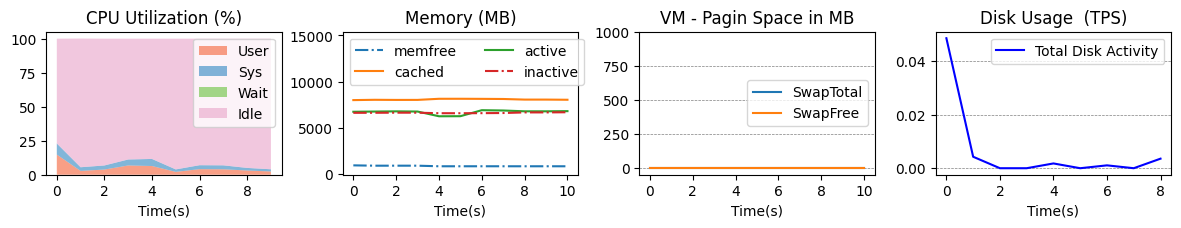

In [20]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(12, 2))  # Changed to 3x3 for three models
#plt.setp(axs, ylim=(-10, 110))
fig.tight_layout(pad=1.0)

color_map = ["#f46036", "#2e86c1", "#67c23a", "#e9a3c9"]

x_ml = [0,2,4,6,8, 10]
tick_labels_ml = ['0', '2', '4', '6', '8','10']


labels = ['User', 'Sys', 'Wait', 'Idle']
axs[0].set_xticks(x_ml, tick_labels_ml)
axs[0].set_axisbelow(True)
axs[0].set_facecolor("white")
axs[0].set_title('CPU Utilization (%)')
axs[0].set_xlabel('Time(s)')
axs[0].stackplot(range(10), [m_o['User CPU%'].values, m_o['System CPU%'].values, m_o['I/O Wait CPU%'].values, m_o['Idle CPU%'].values], colors = color_map, alpha=0.6, edgecolor='none', linewidth=1.5,labels=labels)
axs[0].legend(loc='upper right')

axs[1].set_xticks(x_ml, tick_labels_ml)
axs[1].set_axisbelow(True)
axs[1].set_title('Memory (MB)')
axs[1].set_xlabel('Time(s)')
axs[1].plot(m_o_mem['Free Memory'], linestyle='dashdot', label='memfree')
axs[1].plot(m_o_mem['Used Memory'], label='cached')
axs[1].plot(m_o_mem['Active Memory'], label='active')
axs[1].plot(m_o_mem['Inactive Memory'], linestyle='dashdot', label='inactive')
axs[1].legend(loc='upper left',ncol=2)
axs[1].set_ylim(ymin=-50, ymax=15400)

"""
axs[2].set_xticks(x_ml, tick_labels_ml)
axs[2].set_axisbelow(True)
axs[2].yaxis.grid(color='gray', linestyle='dashed', linewidth=.5)
axs[2].set_title('Total Processes')
axs[2].set_xlabel('Time(s)')
axs[2].plot(m_o_pswitch['Total Processes'], label="# of Process")
axs[2].legend(loc='upper right')"""


axs[3].set_xticks(x_ml, tick_labels_ml)
axs[3].set_title('Disk Usage  (TPS)')
axs[3].set_xlabel('Time(s)')
axs[3].plot(m_o_db['Disk Usage %'], label='Total Disk Activity', color='b')
axs[3].set_axisbelow(True)
axs[3].yaxis.grid(color='gray', linestyle='dashed', linewidth=.5)
axs[3].legend(loc='upper right')




axs[2].set_xticks(x_ml, tick_labels_ml)
axs[2].set_facecolor("white")
axs[2].set_title('VM - Pagin Space in MB')
axs[2].set_xlabel('Time(s)')
axs[2].set_ylim(-50,1000)
axs[2].plot(m_o_swap, label=('SwapTotal', 'SwapFree'))
axs[2].set_axisbelow(True)
axs[2].yaxis.grid(color='gray', linestyle='dashed', linewidth=.5)
axs[2].legend( loc='center right')


plt.savefig("OpenELM.pdf", format="pdf", bbox_inches="tight")
